In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def event(r1, r2, r3):
    # generate an event from rates
    exponentials = [np.random.exponential(1/z) for z in [r1, r2, r3]]
    shortestHoldingTimeIndex = np.argmin(exponentials)
    return shortestHoldingTimeIndex, exponentials[shortestHoldingTimeIndex]

In [3]:
def simulation(b, d, q, x1, x2, numEvents):
    population = [x1, x2]
    holdingTimes = [0]

    realization = [population]
    possibilities = [np.array([1, 0]), np.array([0, -1]), np.array([-1, 1])] # all event possibilities used to update population

    for _ in range(numEvents):
        if 0 in population:
            break
        eventIndex, eventHoldingTime = event(b*population[0], d*population[1], q*population[0]*population[1])
        population = population + possibilities[eventIndex]
        realization.append(population)
        holdingTimes.append(eventHoldingTime)
    
    data = pd.DataFrame(realization, columns=["Rabbits", "Wolves"])
    data["Holding Times"] = holdingTimes
    data["Timestamps"] = np.cumsum(data["Holding Times"])
    return data

In [4]:
def plot_simulation(data, b, d, q):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Timestamps"], data["Rabbits"], label="Rabbits")
    plt.plot(data["Timestamps"], data["Wolves"], label="Wolves")
    plt.legend()
    plt.title("b, d, q = " + str(b) + ", " + str(d) + ", " + str(q))
    plt.show()

In [5]:
def plot_phase(data, b, d, q):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Rabbits"], data["Wolves"], label="Rabbits vs Wolves")
    plt.legend()
    plt.title("b, d, q = " + str(b) + ", " + str(d) + ", " + str(q))
    plt.xlabel("Rabbits")
    plt.ylabel("Wolves")
    plt.show()

In [6]:
def main():
    data1 = simulation(1, 6, .01, 1000, 1000, 100000)
    plot_simulation(data1, 1, 6, .01)
    plot_phase(data1, 1, 6, .01)
    print("\n")

    data2 = simulation(2, 1.1, .01, 1000, 1000, 100000)
    plot_simulation(data2, 2, 1.1, .01)
    plot_phase(data2, 2, 1.1, .01)
    print("\n")

    data3 = simulation(6, 6, .01, 1000, 1000, 100000)
    plot_simulation(data3, 6, 6, .01)
    plot_phase(data3, 6, 6, .01)
    print("\n")

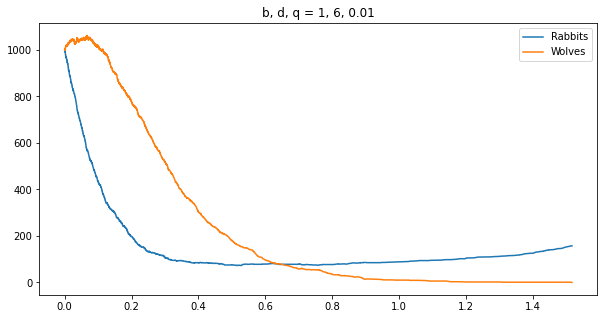

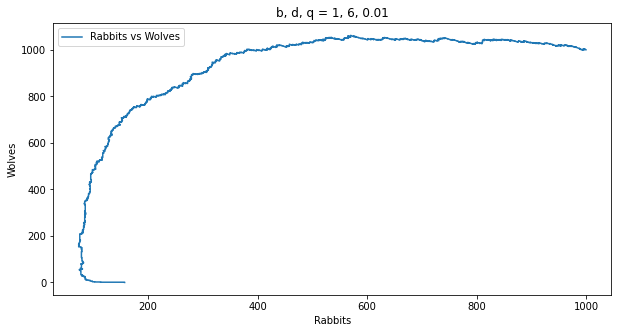

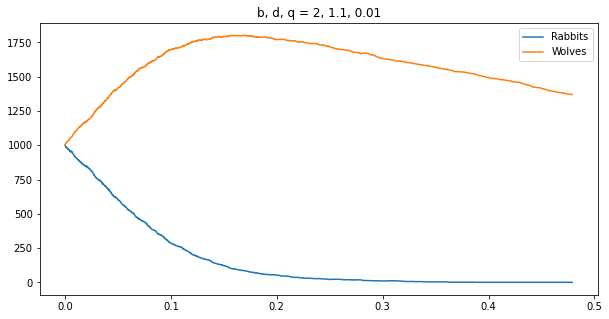

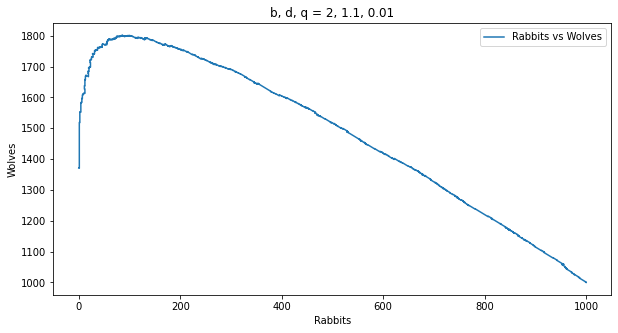

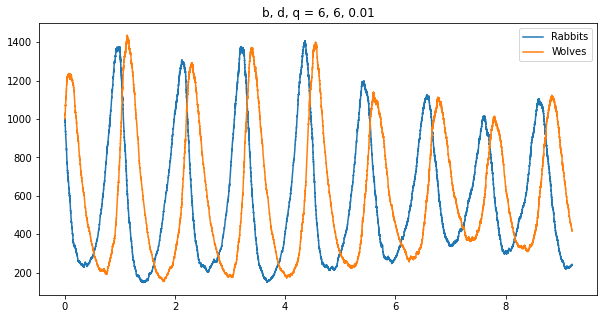

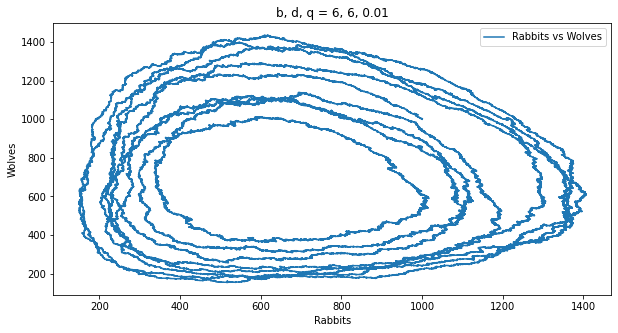

In [7]:
if __name__ == "__main__":
    main()